# NYC Taxi Fare Data

In [90]:
import numpy as np
import pandas as pd

In [91]:
df = pd.read_csv('NYC_taxi.csv')
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
99247,48:29.0,6.9,2010-04-26 22:48:29 UTC,-74.000813,40.730705,-73.991374,40.749789,1
99248,22:00.0,21.3,2009-01-30 20:22:00 UTC,-73.995508,40.759467,-73.991242,40.691893,1
99249,35:00.0,9.7,2011-06-02 11:35:00 UTC,-73.976572,40.764542,-73.955543,40.787830,1
99250,47:00.0,22.5,2012-12-19 18:47:00 UTC,-73.962287,40.810520,-73.972930,40.756205,4


# Data Preprocessing

Euclidean Distance

In [92]:
def euc_distance (lat1, long1, lat2, long2):
  return((lat1-lat2)**2 + (long1-long2)**2)**0.5

df['distance'] = euc_distance(df['pickup_latitude'],
                              df['pickup_longitude'],
                              df['dropoff_latitude'],
                              df['dropoff_longitude'])


Validate Calculation

In [93]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470
...,...,...,...,...,...,...,...,...,...
99247,48:29.0,6.9,2010-04-26 22:48:29 UTC,-74.000813,40.730705,-73.991374,40.749789,1,0.021291
99248,22:00.0,21.3,2009-01-30 20:22:00 UTC,-73.995508,40.759467,-73.991242,40.691893,1,0.067709
99249,35:00.0,9.7,2011-06-02 11:35:00 UTC,-73.976572,40.764542,-73.955543,40.787830,1,0.031378
99250,47:00.0,22.5,2012-12-19 18:47:00 UTC,-73.962287,40.810520,-73.972930,40.756205,4,0.055348


Separating column 'pickup_datetime' into year, month, day, dayofweek, and hour.

In [95]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['year']=df['pickup_datetime'].dt.year
df['month']=df['pickup_datetime'].dt.month
df['day']=df['pickup_datetime'].dt.day
df['day_of_week']=df['pickup_datetime'].dt.day_of_week
df['hour']=df['pickup_datetime'].dt.hour


Validate Transformation

In [96]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,day_of_week,hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99247,48:29.0,6.9,2010-04-26 22:48:29+00:00,-74.000813,40.730705,-73.991374,40.749789,1,0.021291,2010,4,26,0,22
99248,22:00.0,21.3,2009-01-30 20:22:00+00:00,-73.995508,40.759467,-73.991242,40.691893,1,0.067709,2009,1,30,4,20
99249,35:00.0,9.7,2011-06-02 11:35:00+00:00,-73.976572,40.764542,-73.955543,40.787830,1,0.031378,2011,6,2,3,11
99250,47:00.0,22.5,2012-12-19 18:47:00+00:00,-73.962287,40.810520,-73.972930,40.756205,4,0.055348,2012,12,19,2,18


Dropping all NULL Values

In [97]:
print(df.isnull().any())

key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
distance             False
year                 False
month                False
day                  False
day_of_week          False
hour                 False
dtype: bool


In [98]:
df.dropna(inplace=True)
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,day_of_week,hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.009436,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.079696,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.013674,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.025340,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.019470,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99247,48:29.0,6.9,2010-04-26 22:48:29+00:00,-74.000813,40.730705,-73.991374,40.749789,1,0.021291,2010,4,26,0,22
99248,22:00.0,21.3,2009-01-30 20:22:00+00:00,-73.995508,40.759467,-73.991242,40.691893,1,0.067709,2009,1,30,4,20
99249,35:00.0,9.7,2011-06-02 11:35:00+00:00,-73.976572,40.764542,-73.955543,40.787830,1,0.031378,2011,6,2,3,11
99250,47:00.0,22.5,2012-12-19 18:47:00+00:00,-73.962287,40.810520,-73.972930,40.756205,4,0.055348,2012,12,19,2,18


In [99]:
print(df.isnull().any())

key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
distance             False
year                 False
month                False
day                  False
day_of_week          False
hour                 False
dtype: bool


Drop unwanted columns

In [100]:
drop_columns = ['key', 'pickup_datetime', 'pickup_latitude', 'pickup_longitude', 'dropoff_longitude', 'dropoff_latitude']
df = df.drop(columns=drop_columns, axis=1)
df

,fare_amount,passenger_count,distance,year,month,day,day_of_week,hour
0,4.5,1,0.009436,2009,6,15,0,17
1,16.9,1,0.079696,2010,1,5,1,16
2,5.7,2,0.013674,2011,8,18,3,0
3,7.7,1,0.025340,2012,4,21,5,4
4,5.3,1,0.019470,2010,3,9,1,7
...,...,...,...,...,...,...,...,...
99247,6.9,1,0.021291,2010,4,26,0,22
99248,21.3,1,0.067709,2009,1,30,4,20
99249,9.7,1,0.031378,2011,6,2,3,11
99250,22.5,4,0.055348,2012,12,19,2,18


Now we have 8 columns left and the dataset have different columns.



Find out the distribution of data

In [101]:
print(df.describe())

        fare_amount  passenger_count      distance          year  \
count  99252.000000     99252.000000  99252.000000  99252.000000   
mean      11.354824         1.673639      0.198707   2011.743632   
std        9.713630         1.300265      4.411613      1.865973   
min      -44.900000         0.000000      0.000000   2009.000000   
25%        6.000000         1.000000      0.012389   2010.000000   
50%        8.500000         1.000000      0.021476   2012.000000   
75%       12.500000         2.000000      0.038591   2013.000000   
max      200.000000         6.000000    662.561258   2015.000000   

              month           day   day_of_week          hour  
count  99252.000000  99252.000000  99252.000000  99252.000000  
mean       6.261405     15.666505      3.035314     13.492443  
std        3.450800      8.676768      1.949311      6.508252  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      8.000000      1.000000      9.000000  
50%

We noticed that the lowest value (MIN) in column '***fare_amount***' has a value of -44.9 which does not make any sense. So we are going to drop any values that are in negative numbers and any amount that is lower than $3.

Same as '***passenger_count***', '***distance***', ***day_of_week***', and '***hour***'.

In [102]:
# Lets check how many 0 are there in each columns

print("Number of rows with 0 values for each variable")
for col in df.columns:
  missing_rows = df.loc[df[col]==0].shape[0]
  print(col+":"+str(missing_rows))

Number of rows with 0 values for each variable
fare_amount:3
passenger_count:366
distance:2892
year:0
month:0
day:0
day_of_week:12864
hour:3857


In [103]:
df = df[(df[['fare_amount', 'passenger_count', 'distance', 'day_of_week', 'hour']] != 0).all(axis=1)]
print(df)

       fare_amount  passenger_count  distance  year  month  day  day_of_week  \
1            16.90                1  0.079696  2010      1    5            1   
3             7.70                1  0.025340  2012      4   21            5   
4             5.30                1  0.019470  2010      3    9            1   
5            12.10                1  0.038675  2011      1    6            3   
6             7.50                1  0.014565  2012     11   20            1   
...            ...              ...       ...   ...    ...  ...          ...   
99246        32.33                1  0.121197  2015      1   18            6   
99248        21.30                1  0.067709  2009      1   30            4   
99249         9.70                1  0.031378  2011      6    2            3   
99250        22.50                4  0.055348  2012     12   19            2   
99251         7.70                1  0.022691  2012      1   21            5   

       hour  
1        16  
3         4

In [107]:
# Drop any value that is lower than 3 in 'fare_amount'
df = df[df['fare_amount'] >= 3]
df

,fare_amount,passenger_count,distance,year,month,day,day_of_week,hour
1,16.90,1,0.079696,2010,1,5,1,16
3,7.70,1,0.025340,2012,4,21,5,4
4,5.30,1,0.019470,2010,3,9,1,7
5,12.10,1,0.038675,2011,1,6,3,9
6,7.50,1,0.014565,2012,11,20,1,20
...,...,...,...,...,...,...,...,...
99246,32.33,1,0.121197,2015,1,18,6,13
99248,21.30,1,0.067709,2009,1,30,4,20
99249,9.70,1,0.031378,2011,6,2,3,11
99250,22.50,4,0.055348,2012,12,19,2,18


After dropping rows that has value of 0 in specific columns, we still have 79,715 rows which is still sufficient for the model.

Checking

In [108]:
print(df.describe())

        fare_amount  passenger_count      distance          year  \
count  79715.000000     79715.000000  7.971500e+04  79715.000000   
mean      11.372834         1.686797  1.925511e-01   2011.754187   
std        9.534073         1.303655  4.509074e+00      1.872770   
min        3.000000         1.000000  1.000000e-06   2009.000000   
25%        6.000000         1.000000  1.309274e-02   2010.000000   
50%        8.500000         1.000000  2.206824e-02   2012.000000   
75%       12.500000         2.000000  3.907365e-02   2013.000000   
max      200.000000         6.000000  6.625613e+02   2015.000000   

              month           day   day_of_week          hour  
count  79715.000000  79715.000000  79715.000000  79715.000000  
mean       6.255046     15.670827      3.463225     14.005344  
std        3.452973      8.676791      1.666618      6.099226  
min        1.000000      1.000000      1.000000      1.000000  
25%        3.000000      8.000000      2.000000      9.000000  
50%

# Set up for Deep Learning Model

In [111]:
# Assign columns as X and y

X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

Train, test and split

In [112]:
# Setting train set 70% of the data and 30% for test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Model Building

In [113]:
# Import model and layer

from tensorflow import keras
from tensorflow.keras import layers

Add the input, hidden, and output layers

In [114]:
model = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(7,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

We set 32 neurons for the input layer, 16 neurons for the hidden and 1 for output layer.

Input shape is 7 because we are using all columns except 'fare_amount' which is our target variable.

Model Compiling

In [117]:
# Assign Loss function and Optimizer

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [118]:
# Train the model

history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_split=0.2, verbose=1)

Epoch 1/50
620/620 [==============================] - 2s 2ms/step - loss: -648524736.0000 - accuracy: 0.0000e+00 - val_loss: -724423872.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
620/620 [==============================] - 1s 2ms/step - loss: -820386496.0000 - accuracy: 0.0000e+00 - val_loss: -908614144.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
620/620 [==============================] - 1s 2ms/step - loss: -1019743104.0000 - accuracy: 0.0000e+00 - val_loss: -1121223296.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
620/620 [==============================] - 3s 5ms/step - loss: -1249773568.0000 - accuracy: 0.0000e+00 - val_loss: -1364911360.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
620/620 [==============================] - 2s 3ms/step - loss: -1511880960.0000 - accuracy: 0.0000e+00 - val_loss: -1641926784.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
620/620 [==============================] - 1s 2ms/step - loss: -1807957888.0000 - accuracy: 0.0000e+00 - val_loss: -1953723392.0000 - val_accur

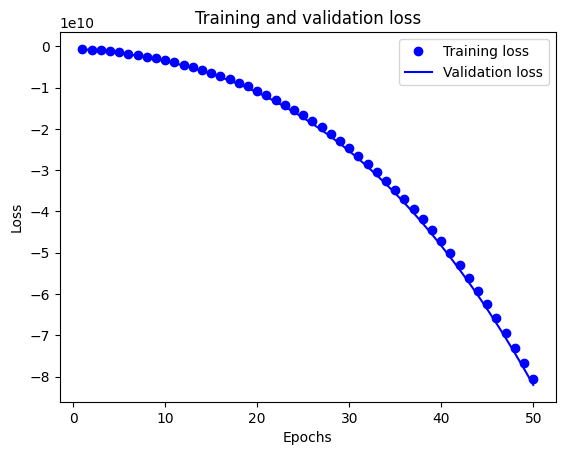

In [119]:
# Plotting training and validation loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")         # "bo" for blue dots
plt.plot(epochs, val_loss, "b", label="Validation loss")    # "b" for solid blue line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

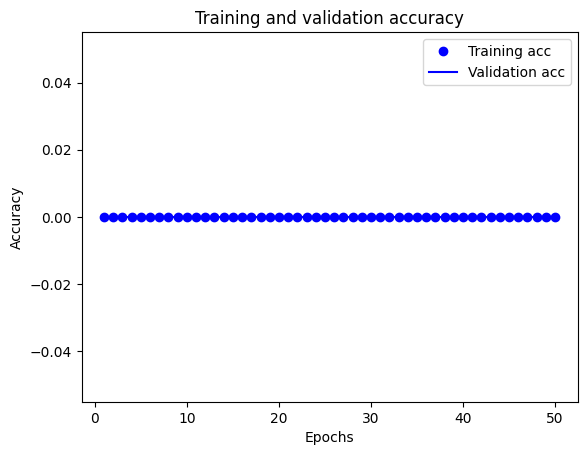

In [120]:
# Plotting training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Test the Model

In [121]:
# Retrain model and test

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
109/109 [==============================] - 1s 2ms/step - loss: -25162.4414 - accuracy: 0.0000e+00
Epoch 2/4
109/109 [==============================] - 0s 2ms/step - loss: -82524.7188 - accuracy: 0.0000e+00
Epoch 3/4
109/109 [==============================] - 0s 2ms/step - loss: -187493.5781 - accuracy: 0.0000e+00
Epoch 4/4
748/748 [==============================] - 1s 2ms/step - loss: -461872.0000 - accuracy: 0.0000e+00


In [122]:
# Print the result
results

[-461872.0, 0.0]

Example 2 

In [1]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np  # NumPy for numerical operations
from sklearn.preprocessing import MinMaxScaler  # Scaler for data normalizat

In [2]:
# Load the CSV data into a pandas DataFrame
data = pd.read_csv('NYC_taxi_fares.csv')  # Load the data from the CSV file into 'data'

# Create another DataFrame with the same data for demonstration
df = pd.read_csv('NYC_taxi_fares.csv')  # Load the data from the CSV file into 'df'

# Display the DataFrame to view the loaded data
print(df)  # Print the contents of the 'df' DataFrame to view the loaded data


             key  fare_amount          pickup_datetime  pickup_longitude  \
0        26:21.0          4.5  2009-06-15 17:26:21 UTC        -73.844311   
1        52:16.0         16.9  2010-01-05 16:52:16 UTC        -74.016048   
2        35:00.0          5.7  2011-08-18 00:35:00 UTC        -73.982738   
3        30:42.0          7.7  2012-04-21 04:30:42 UTC        -73.987130   
4        51:00.0          5.3  2010-03-09 07:51:00 UTC        -73.968095   
...          ...          ...                      ...               ...   
1048570  05:00.0          7.0  2014-09-13 17:05:00 UTC        -73.962580   
1048571  48:25.0          8.9  2012-02-04 18:48:25 UTC        -73.990152   
1048572  16:00.0          6.9  2012-06-22 19:16:00 UTC        -73.963888   
1048573  12:00.0         12.0  2014-01-10 19:12:00 UTC        -73.972328   
1048574  15:39.0         13.0  2015-03-31 13:15:39 UTC        -73.980576   

         pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0     

In [3]:
# Select relevant columns for normalization
selected_columns = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
data_selected = data[selected_columns] # Create a new DataFrame with only the selected columns for normalization

In [4]:
# Normalize the data to the range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
data_normalized = scaler.fit_transform(data_selected) # Use the scaler to fit and transform the selected data, normalizing it

In [5]:
# Import necessary components for building the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization

In [6]:
# Generator model
def build_generator(latent_dim):
    model = Sequential()   # Initialize a Sequential model for the generator
    model.add(Dense(128, input_dim=latent_dim))  # Add a dense layer with 128 units and specified input dimension
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(5, activation='tanh'))  # Add another dense layer with 5 units and 'tanh' activation for output (5 features)
    return model   # Return the generator model


In [7]:
# Discriminator model
def build_discriminator():
    model = Sequential()    # Initialize a Sequential model for the discriminator
    model.add(Dense(128, input_dim=5))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))  # Output: Real or Fake
    return model               # Return the discriminator model

In [8]:
# Import necessary components for building the GAN
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam


In [9]:
# Define the dimension of the latent space
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator()

In [10]:
# Compile the discriminator model
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
discriminator.trainable = False

In [11]:
gan_input = Input(shape=(latent_dim,)) # Define the input for the GAN
generated_data = generator(gan_input)  # Generate data using the generator based on the input
gan_output = discriminator(generated_data) # Pass the generated data through the discriminator

gan = Model(gan_input, gan_output)    # Compile the GAN model with binary cross-entropy loss and the Adam optimizer
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [12]:
# Define a function to train the GAN
def train_gan(epochs, batch_size):
    for epoch in range(epochs):      # Loop through the specified number of epochs
        for _ in range(batch_size):   # Loop through the batches for each epoch
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            generated_data = generator.predict(noise)
            real_data = data_normalized[np.random.randint(0, data_normalized.shape[0], batch_size)] # Sample real data from the normalized dataset

            # Train discriminator
            d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
            d_loss_fake = discriminator.train_on_batch(generated_data, np.zeros((batch_size, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train generator
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print progress
        print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")

# Set the number of epochs and batch size for training
epochs = 5
batch_size = 32
train_gan(epochs, batch_size)   # Train the GAN using the specified number of epochs and batch size

1/1 [==============================] - 0s 24ms/step
Epoch 0, D Loss: 0.6699506640434265, G Loss: 0.7693480253219604
1/1 [==============================] - 0s 23ms/step
Epoch 1, D Loss: 0.6238306164741516, G Loss: 0.7891080379486084
1/1 [==============================] - 0s 22ms/step
Epoch 2, D Loss: 0.6012605130672455, G Loss: 0.8236382007598877
1/1 [==============================] - 0s 22ms/step
Epoch 3, D Loss: 0.5737512111663818, G Loss: 0.8361077308654785
1/1 [==============================] - 0s 32ms/step
Epoch 4, D Loss: 0.5814323127269745, G Loss: 0.8147320747375488


# print the result
result 

[0.5814323127269745,0.8147320747375488]